In [91]:
import torch
import inspect
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
torch.__version__

'0.3.1b0+4cf3225'

In [92]:
input_size = 8
num_classes = 1
num_epochs=100
batch_size=100
learning_rate=0.1
torch.manual_seed(120)

In [93]:
class LogisticRegresion(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegresion, self).__init__()
        self.l1 = nn.Linear(input_size, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        out3 = self.sigmoid(self.l3(out2))
        return out3

In [94]:
class Titanic_Train_Dataloader(Dataset):
    def __init__(self):
        self.x_data = pd.read_csv('../Data/new_data.csv', delimiter=',', dtype = np.float32, header = 0)
        self.y_data = pd.read_csv('../Data/new_targets.csv', delimiter=',', dtype = np.float32, header = 0)
        self.x_data = torch.from_numpy(self.x_data.as_matrix())
        self.y_data = torch.from_numpy(self.y_data.as_matrix())
        self.len = self.x_data.shape[0]
        print(self.x_data)
    
    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [95]:
class Titanic_Test_Dataloader(Dataset):
    def __init__(self):
        self.x_data = pd.read_csv('../Data/new_test_data.csv', delimiter=',', dtype = np.float32, header = 0)
        self.y_data = pd.read_csv('../Data/gender_submission.csv', delimiter=',', dtype = np.float32, header = 0)
        self.x_data = torch.from_numpy(self.x_data.as_matrix())
        self.y_data = torch.from_numpy(self.y_data.as_matrix())
        self.len = self.x_data.shape[0]
    
    def __getitem__(self, index):
        return self.x_data[index],self.y_data[index]
    
    def __len__(self):
        return self.len

In [96]:
model = LogisticRegresion(input_size, num_classes=num_classes)

In [97]:
titanic_train_data = Titanic_Train_Dataloader()
train_loader = DataLoader(dataset = titanic_train_data, batch_size=32, shuffle = True)
titanic_test_data = Titanic_Test_Dataloader()
test_loader = DataLoader(dataset = titanic_test_data, batch_size=32, shuffle = True)


    3     0     1  ...      1     0     3
    1     1     2  ...      3     0     2
    3     1     1  ...      2     1     3
       ...          ⋱          ...       
    3     1     1  ...      2     0     3
    1     0     1  ...      1     1     1
    3     0     1  ...      1     1     3
[torch.FloatTensor of size 891x8]



In [98]:
crieterion = nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
total_train_loss = 0
total_test_loss = 0
num_train_examples = 891
num_test_examples = test_loader.__len__()*32
training_losses = []
testing_losses = []
iterations = []
print(num_train_examples, num_test_examples)

891 416


In [99]:
for epoch in range(num_epochs):
        total_train_loss = 0.0
        total_test_loss = 0.0
        for _index, train_data in enumerate(train_loader):
            x_train, y_train = train_data
            x_train = Variable(x_train)
            y_train = Variable(y_train)
            optimizer.zero_grad()
            outputs = model(x_train)
            train_loss = crieterion(outputs, y_train)
            total_train_loss += train_loss.data[0]
            train_loss.backward()
            optimizer.step()
        for index, test_data in enumerate(test_loader):
            x_test, y_test = test_data
            x_test = Variable(x_test)
            y_test = Variable(y_test)
            y_pred = model(x_test)
            test_loss = crieterion(y_pred, y_test)
            total_test_loss += test_loss.data[0]    
        total_train_loss /= num_train_examples
        total_test_loss /= num_test_examples
        training_losses.append(total_train_loss)
        testing_losses.append(total_test_loss)
        iterations.append(epoch)
        print(f'[{epoch}/{num_epochs}]Train_loss:{total_train_loss}Test_loss:{total_test_loss}')
#         print(f'Train_loss[{epoch}/{num_epochs}] {total_train_loss} Test_loss [{epoch}/{num_epochs}] {total_test_loss}')
        total_train_loss = 0
        total_test_loss = 0

[0/100]Train_loss:0.021241382650788516Test_loss:0.020656369626522064
[1/100]Train_loss:0.020927892790900335Test_loss:0.020546603088195507
[2/100]Train_loss:0.02091122710477356Test_loss:0.020520545112398956
[3/100]Train_loss:0.020892888274123236Test_loss:0.02049473486840725
[4/100]Train_loss:0.02087780682727544Test_loss:0.02048746381814663
[5/100]Train_loss:0.020862174957288235Test_loss:0.020468671877796833
[6/100]Train_loss:0.020866343001056335Test_loss:0.020497997363026325
[7/100]Train_loss:0.02083930082192726Test_loss:0.0204734095873741
[8/100]Train_loss:0.0208360189540619Test_loss:0.02045082372541611
[9/100]Train_loss:0.02082166045603126Test_loss:0.0204512753452246
[10/100]Train_loss:0.020786316440295424Test_loss:0.020452564152387474
[11/100]Train_loss:0.020756485887649483Test_loss:0.020389560753336318
[12/100]Train_loss:0.02075318916879519Test_loss:0.02039221115410328
[13/100]Train_loss:0.020739818261528657Test_loss:0.020354970573232725
[14/100]Train_loss:0.020720705707734148Test_l

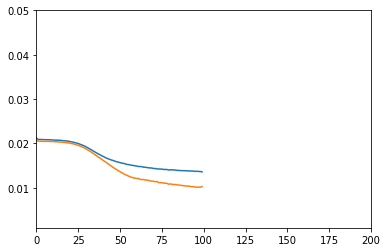

In [100]:
# print(iterations)
axes = plt.gca()
axes.set_xlim([0, 200])
axes.set_ylim([0.001, 0.05])
plt.plot(iterations, training_losses)
plt.plot(iterations, testing_losses)
plt.show()

In [102]:
index
correct = 0
for index, data in enumerate(test_loader):
    x_data, y_data = data
    x_data = Variable(x_data)
    y_data = Variable(y_data)
    y_pred = model(x_data)
    y_data.squeeze_()
    y_pred.squeeze_()
#     print(y_pred[0],y_data[0])
    for i in range(32):
        if y_pred[i].data.numpy() < 0.5 and y_data[i].data.numpy() == 0:
                correct = correct + 1
        if y_pred[i].data.numpy() >= 0.5 and y_data[i].data.numpy() == 1:
                correct = correct + 1
index = index + 1
total = 32 * index
accuracy = correct/total
print(f'Accuracy is {accuracy*100}%' )

Accuracy is 87.5%
